# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastian Calderon Altamirano
- Nombre de alumno 2: Camila Vera Gallardo

### **Link de repositorio de GitHub:**
[Repo Sebastian Calderon](https://github.com/eldiddy/eldiddy.git)
[Repo Camila Vera](https://github.com/cxmilavg/cxmilavg.git)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. El conjunto de entrenamiento corresponde a el subconjunto sobre el cual el modelo aprende los patrones (ajusta los parámetros), mientras que el conjunto de validación es el subconjunto sobre el cual se prueba el modelo con datos con los que no fue entrenado, es una especie de test del modelo.

2. El principal desafío de trabajar con datos no supervisados es que estos no se encuentran etiquetados, por lo que se puede llegar a cometer el error de no utilizar las clases que realmente sirven o algún tipo de error similar

3. La matriz de confusión es una matriz que muestra qué tan correctas son las predicciones entregando cuantas predicciones fueron correctas para cada clase o equivocadas. Sirve para poder ver los resultados falsos positivos, falsos negativos, verdaderos positivo y falso negativo.

4. - Para el accuracy:

$$\text{accuracy}=\frac{\text{número de predicciones correctas}}{\text{número de predicciones totales}}$$

La formula anterior entrega el % de resultados correctos.

- Precision:

$$
P=\frac{\text{Clasificados correctamente como positivo}}{\text{Todos los predichos como positivos}}
=\frac{TP}{TP+FP}
$$

Lo anterior entrega el resultado de los elementos clasificados como positivos qué porcentaje realmente es positivo.

- Recall:
$$
R=\frac{\text{Clasificados correctamente como positivo}}{\text{Todos los que debería haber clasificado como positivos}}
=\frac{TP}{TP+FN}
$$


El recall significa que porcentaje de datos fueron clasificados correctamente como positivos del total de elementos que debieron haber sido clasificados como positivos.

- F1 score:
$$
F=\frac{2PR}{P+R}
$$


Es la media armónica entre recall y precision, es ideal cuando se tienen datos desbalanceados.


5. - Mantenimiento predictivo: utilizaría recall como método principal, ya que así se puede tener un buen conocimeinto de las fallas que ocurran (falla = positivo).

- Enfermedades contagiosas: en este caso priorizaría el recall nuevamente, ya que si consideramos como enfermo = positivo obtener un recall alto es mejor.

- Créditos: Si consideramos positivo = 'aprobar', en este caso se requiere tener una menor cantidad de Positivos negativos (FP), por lo que hay que priorizar como métrica la precision, de manera que se pueda ver la calidad de la aprobación de los créditos.

- Detección de crímenes: en este caso importan los falsos positivos (culpar a alguien inocente) y falsos negativos (no detectar), por lo que en este caso se debe priorizar la métrica F1, ya que combina las métricas de precision y recall, las cuales priorizan ambos casos.

6. La calibración de modelos es el proceso de alinear las probabilidades predichas con las frecuencias reales. Es importante aplicar una calibración porque generalmente los modelos de machine learning poseen sesgos en las distribuciones de salida, por lo que utilizar calibración ayuda con la toma de decisiones. Además, las probabilidades esperadas permiten flexibilidad. Además, la calibración permite que cada modelo se centre en estimar sus probabilidades particulares lo mejor posible.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
from google.colab import drive
drive.mount("/content/drive")

# Cargar el dataset
path = '/content/drive/MyDrive/MDS7202/stats_players.csv'
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
# 1. Crear la nueva columna 'label' basada en la columna 'National_Position'
df['label'] = df['National_Position'].notnull().astype(int)
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1


In [4]:
# 2. Contar los ejemplos por cada clase
class_counts = df['label'].value_counts()
class_counts

,count
label,
0,16513
1,1075


In [5]:
# 3. ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Eliminar columnas
columns_to_drop = ['Name', 'Nationality', 'National_Position', 'Club_Position', 'Work_Rate']

df_model = df.drop(columns=columns_to_drop)

# Definir las columnas numericas y categoricas
numeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.drop('label') # Excluir 'label'
categorical_cols = df_model.select_dtypes(include=['object']).columns

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),                                                         # Escalado para variables numericas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncoding para variables categoricas
    ])

##### 4. Justificación de las transformaciones elegidas

**Columnas numéricas (StandardScaler):**  
Las columnas numéricas deben ser escaladas para asegurar que todas las características tengan la misma escala. Esto es especialmente importante cuando se utilizan modelos que son sensibles a la magnitud de los datos, como la regresión logística o las máquinas de soporte vectorial (SVM). Si las columnas no están escaladas, las características con valores más grandes pueden dominar el proceso de entrenamiento, lo que afecta negativamente la precisión del modelo.

El uso de `StandardScaler` estandariza los valores de las variables numéricas, transformándolas para que tengan una media de 0 y una desviación estándar de 1. Esto permite una mejor convergencia de los algoritmos de aprendizaje y mejora la eficiencia del entrenamiento.

**Columnas categóricas (OneHotEncoder):**  
Las columnas categóricas, como las posiciones de los jugadores (por ejemplo, 'delantero', 'mediocampista', etc.), deben ser convertidas en valores numéricos para que los modelos de clasificación puedan procesarlas. El `OneHotEncoder` es la herramienta adecuada para esto, ya que crea una columna binaria (0 o 1) para cada categoría. Esto permite que cada categoría sea representada por una variable independiente, manteniendo la relación entre las clases sin introducir un orden implícito.

Por ejemplo, si tenemos tres categorías ('delantero', 'mediocampista', 'defensor'), el `OneHotEncoder` creará tres columnas donde cada jugador tendrá un valor de 1 en la columna correspondiente a su posición, y 0 en las otras dos. Esto es importante porque evita que el modelo asuma relaciones jerárquicas entre las categorías, que no existen en realidad.

El uso de estas transformaciones asegura que cada tipo de dato sea tratado adecuadamente, permitiendo que el modelo predictivo trabaje de manera más eficiente y precisa. Al estandarizar las características numéricas y codificar las variables categóricas, preparamos correctamente los datos para el aprendizaje supervisado.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [6]:
# 1. Separación de datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = df_model.drop(columns=['label'])
y = df_model['label']

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12311, 34), (5277, 34), (12311,), (5277,))

In [7]:
# 2. Definir los pipelines pipeline_xgboost y pipeline_lightgbm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir el pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),                                                         # Escalado para variables numericas
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncoding para variables categoricas
        ])),
    ('classifier', XGBClassifier(random_state=42))  # Clasificador XGBoost
])

# Definir el pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
     ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),                                                         # Escalado para variables numericas
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncoding para variables categorica
        ])),
    ('classifier', lgb.LGBMClassifier(random_state=42))  # Clasificador LightGBM
])

In [8]:
# 3. Entrenar los pipelines

# Entrenar el pipeline de XGBoost
pipeline_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'S...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [9]:
# Entrenar el pipeline de LightGBM
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Preffered_Foot'], dtype='object'))])),
                ('classifier', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [10]:
# 1. Calculamos las metricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predicciones para XGBoost
y_pred_xgboost = pipeline_xgboost.predict(X_test)

# Predicciones para LightGBM
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Metricas para XGBoost
recall_xgboost = recall_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

# Metricas para LightGBM
recall_lightgbm = recall_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)

print("-"*40)
print("Métricas para XGBoost:")
print("-"*40)
print(f"Recall: {recall_xgboost}")
print(f"Precisión: {precision_xgboost}")
print(f"Accuracy: {accuracy_xgboost}")
print("   ")
print("-"*50)
print("Clasification report XGBoost")
print("-"*50)
print(classification_report(y_test, y_pred_xgboost))

# Métricas para LightGBM
print("-"*40)
print("Métricas para LightGBM:")
print("-"*40)
print(f"Recall: {recall_lightgbm}")
print(f"Precisión: {precision_lightgbm}")
print(f"Accuracy: {accuracy_lightgbm}")

print(" ")
print("-"*50)
print("Clasification report LightGBM")
print("-"*50)
print(classification_report(y_test, y_pred_lightgbm))

----------------------------------------
Métricas para XGBoost:
----------------------------------------
Recall: 0.10835913312693499
Precisión: 0.49295774647887325
Accuracy: 0.938601478112564
   
--------------------------------------------------
Clasification report XGBoost
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4954
           1       0.49      0.11      0.18       323

    accuracy                           0.94      5277
   macro avg       0.72      0.55      0.57      5277
weighted avg       0.92      0.94      0.92      5277

----------------------------------------
Métricas para LightGBM:
----------------------------------------
Recall: 0.1021671826625387
Precisión: 0.559322033898305
Accuracy: 0.9401174909986735
 
--------------------------------------------------
Clasification report LightGBM
--------------------------------------------------
              precisi

#### 2. Explicacion de Metricas

###### **Accuracy**
El accuracy mide la cantidad de predicciones correctas sobre el total de predicciones realizadas. Aunque ambos modelos muestran un accuracy muy alto (aproximadamente 94%), este valor no refleja el desempeño sobre la clase positiva (jugadores seleccionados nacionales). Dado que la clase negativa (jugadores no seleccionados) es mucho más grande, los modelos predicen principalmente esta clase y logran una alta precisión global.
- XGBoost: 0.939
- LightGBM: 0.940

###### **Precisión**
La precisión mide cuántos de los jugadores predichos como seleccionados nacionales son realmente seleccionados. Aunque ambos modelos tienen un valor de precisión moderado, indica que los valores siguen siendo bajos, lo que sugiere que los modelos no están identificando correctamente a los jugadores seleccionados nacionales.
- XGBoost: 0.493
- LightGBM: 0.559

###### **Recall**
El recall mide la capacidad del modelo para identificar correctamente a los jugadores seleccionados nacionales. Ambos modelos tienen un recall muy bajo, lo que significa que no están identificando bien a los jugadores seleccionados nacionales. Esto se debe al desbalance de clases, con solo 323 ejemplos de la clase positiva frente a 4954 ejemplos de la clase negativa.
- XGBoost: 0.108
- LightGBM: 0.102

###### **Influencia de la cantidad de ejemplos por clase**
El desbalance de clases es un factor importante en los resultados. Dado que los jugadores seleccionados nacionales (clase positiva) son muy pocos en comparación con los jugadores no seleccionados nacionales (clase negativa),  los modelos tienden a predecir mayormente la clase mayoritaria (jugadores no seleccionados). Este desbalance provoca un 'accuracy' alto, pero los valores de precisión y recall para la clase positiva son bajos.



#### 3. Mejor Desempeño

La métrica más adecuada en este caso es la precisión, ya que el objetivo es asegurarnos de que los jugadores seleccionados nacionales que son predichos como tales,  realmente lo sean. La precisión nos ayuda a evitar los falsos positivos, es decir, evitar que jugadores no seleccionados nacionales sean etiquetados incorrectamente como seleccionados.


## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [11]:
# Definimos las etiquetas descritas anteriormente

ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Creamos una copia del df original
df_posiciones = df.copy()

# Filtrar 'Sub', 'Res' y las posiciones no definidas
posiciones_validas = ataque + central_ataque + central + central_defensa + defensa + arquero
df_posiciones = df_posiciones[df_posiciones['Club_Position'].isin(posiciones_validas)]

# Asignamos la posicion a cada label
def categoria_posicion(posicion):
  if posicion in ataque:
    return 'ataque'
  elif posicion in central_ataque:
    return 'central_ataque'
  elif posicion in central:
    return 'central'
  elif posicion in central_defensa:
    return 'central_defensa'
  elif posicion in defensa:
    return 'defensa'
  elif posicion in arquero:
    return 'arquero'

df_posiciones['label'] = df_posiciones['Club_Position'].apply(categoria_posicion)
df_posiciones.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,central_ataque
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,central_ataque
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,central_ataque
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,ataque
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,arquero


In [12]:
# Contamos cuantos hay por clase
print(df_posiciones['label'].value_counts())

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Primero eliminamos las columnas
columns_to_drop = ['Name', 'Nationality', 'Club_Position', 'National_Position', 'label']

# Separamos caracteristicas y variables objetivos
X = df_posiciones.drop(columns=columns_to_drop)
y = df_posiciones['label']

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Utilizaremos Linear SVC de acuerdo a la guía
# Identificamos las columnas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocesamos los datos
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


# Comenzamos con el pipeline
pipeline_svc = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', SVC(random_state=42))
])

# Entrenamos el pipeline
pipeline_svc.fit(X_train, y_train)

# Evaluamos el pipeline
y_pred_svc = pipeline_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.78      0.86      0.82        86
        central       0.56      0.68      0.62       182
 central_ataque       0.50      0.25      0.33       116
central_defensa       0.56      0.12      0.20        42
        defensa       0.82      0.97      0.89       236

       accuracy                           0.74       788
      macro avg       0.70      0.65      0.64       788
   weighted avg       0.72      0.74      0.72       788



### Analisis  de Resultados

**Arquero:**
El modelo tiene un rendimiento perfecto en la clase de arquero, lo que significa que identifica correctamente a todos los jugadores en esta categoría y no comete errores al predecir esta posición. Esto podría reflejar que la clase "arquero" tiene una característica distintiva muy fuerte, que hace que el modelo sea muy efectivo para predecirla.

- **Precisión**: 1.00
- **Recall**: 1.00
- **F1-score**: 1.00
- **Soporte**: 126


**Ataque:**
El modelo tiene buen desempeño en la clase "ataque", con un recall alto (0.86), lo que significa que es bastante bueno para identificar a los jugadores que deberían estar en posiciones de ataque. La precisión (0.78) es un poco más baja, lo que indica que algunos jugadores que fueron clasificados como ataque no son realmente adecuados para esa posición. Sin embargo, la relación precisión-recall es balanceada, lo que muestra que el modelo logra un buen equilibrio en esta clase.

- **Precisión**: 0.78
- **Recall**: 0.86
- **F1-score**: 0.82
- **Soporte**: 86


**Central:**
Para la clase "central", el modelo muestra un recall relativamente alto (0.68), pero la precisión es algo más baja (0.56). Esto sugiere que el modelo es bastante bueno para identificar a los jugadores que deberían estar en posiciones centrales, pero está cometiendo varios falsos positivos, clasificando incorrectamente a algunos jugadores en esa categoría. Este desempeño podría mejorarse, tal vez con más entrenamiento o características que ayuden a diferenciar mejor esta posición.

- **Precisión**: 0.56
- **Recall**: 0.68
- **F1-score**: 0.62
- **Soporte**: 182


**Central_ataque:**
La clase "central_ataque" tiene un desempeño bajo, con un recall muy bajo (0.25). Esto significa que el modelo identifica solo una pequeña fracción de los jugadores que realmente deberían estar en posiciones de "central_ataque". La precisión (0.50) es mejor, pero aún insuficiente para considerar que el modelo está prediciendo correctamente esta categoría. Esto sugiere que la categoría de "central_ataque" es probablemente muy difícil de predecir debido a la falta de características distintivas claras que diferencien esta posición de otras, o podría ser un grupo con posiciones intermedias o ambiguas.

- **Precisión**: 0.50
- **Recall**: 0.25
- **F1-score**: 0.33
- **Soporte**: 116


**Central_defensa:**
La clase "central_defensa" tiene un desempeño muy pobre con un recall extremadamente bajo (0.12), lo que indica que solo se está identificando correctamente una pequeña fracción de los jugadores que deberían estar en posiciones de defensa central. Esto puede ser consecuencia de la falta de datos representativos en esta clase, lo que dificulta que el modelo aprenda a identificarla correctamente. Además, la precisión de 0.56 sugiere que el modelo no tiene mucha confianza cuando predice esta clas

- **Precisión**: 0.56
- **Recall**: 0.12
- **F1-score**: 0.20
- **Soporte**: 42


**Defensa:**
La clase "defensa" tiene un rendimiento excelente, con un recall muy alto (0.97) y una buena precisión (0.82). Esto indica que el modelo es muy eficaz para predecir a los jugadores en posiciones defensivas, con muy pocos falsos negativos (es decir, pocos jugadores que deberían estar en defensa pero no lo son). El modelo logra un buen equilibrio entre precisión y recall, lo que demuestra que ha aprendido bien las características de los jugadores que deberían estar en defensa.

- **Precisión**: 0.82
- **Recall**: 0.97
- **F1-score**: 0.89
- **Soporte**: 236


### Evaluación general:
El modelo muestra un buen desempeño en las clases con características claras y bien definidas, como arquero y defensa, pero tiene dificultades en predecir las posiciones más ambiguas o intermedias, como central_ataque y central_defensa.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [14]:
%pip install pycaret

In [27]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os
import time

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Utilizamos pyCaret para encontrar cual modelo del árbol es mejor

# Preparamos los datos usando el dataframe original con la columna 'label' de la sección 1.1
# Eliminamos las columnas no relevantes del modelo
df_jere = df.drop(columns=['Name', 'Nationality', 'National_Position'])

# Ensure the target variable is integer type
df_jere['label'] = df_jere['label'].astype(int)

# Configuramos el entorno de PyCaret
clf_setup = setup(
    data=df_jere,
    target='label',
    session_id=42,
    train_size=0.8,
    fold=5,
    verbose=False,
)

# Comparamos los modelos del árbol
models_to_compare = ['et', 'rf', 'dt', 'xgboost', 'lightgbm'] # Removed 'catboost'

# Crear y evaluar el mejor modelo
best_model = compare_models(
    include=models_to_compare,
    sort='Precision',
    cross_validation=True,
    n_select=1
)

# Análisis de velocidad
timing_results = []

for model_name in models_to_compare:
    start_time = time.time()
    model = create_model(model_name)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"{model_name}: {end_time - start_time:.2f} segundos")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9409,0.8062,0.0581,0.7069,0.1073,0.0989,0.1912,1.6760
rf,Random Forest Classifier,0.9409,0.8045,0.0779,0.6348,0.1386,0.1269,0.2078,2.8520
lightgbm,Light Gradient Boosting Machine,0.9399,0.8378,0.1314,0.5380,0.2109,0.1913,0.2446,1.0220
xgboost,Extreme Gradient Boosting,0.9382,0.8249,0.1337,0.4839,0.2088,0.1872,0.2306,0.8560
dt,Decision Tree Classifier,0.8984,0.5806,0.2186,0.1995,0.2080,0.1540,0.1544,0.3880


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9414,0.8197,0.0698,0.7059,0.1270,0.1173,0.2098
1,0.9407,0.7829,0.0581,0.6667,0.1070,0.0981,0.1850
2,0.9410,0.7848,0.0523,0.7500,0.0978,0.0906,0.1882
3,0.9414,0.8169,0.0581,0.7692,0.1081,0.1004,0.2014
4,0.9403,0.8269,0.0523,0.6429,0.0968,0.0884,0.1717
Mean,0.9409,0.8062,0.0581,0.7069,0.1073,0.0989,0.1912
Std,0.0004,0.0186,0.0064,0.0479,0.0109,0.0102,0.0132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

et: 10.23 segundos


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9424,0.8189,0.0872,0.7500,0.1562,0.1454,0.2433
1,0.9389,0.7826,0.0640,0.5000,0.1134,0.1009,0.1626
2,0.9407,0.7817,0.0640,0.6471,0.1164,0.1066,0.1907
3,0.9414,0.8261,0.0872,0.6522,0.1538,0.1415,0.2240
4,0.9410,0.8134,0.0872,0.6250,0.1531,0.1402,0.2183
Mean,0.9409,0.8045,0.0779,0.6348,0.1386,0.1269,0.2078
Std,0.0012,0.0187,0.0114,0.0800,0.0194,0.0191,0.0282


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

rf: 22.11 segundos


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9016,0.5888,0.2326,0.2162,0.2241,0.1716,0.1717
1,0.8920,0.5674,0.1977,0.1700,0.1828,0.1253,0.1257
2,0.9069,0.5727,0.1919,0.2115,0.2012,0.1519,0.1521
3,0.8930,0.5952,0.2558,0.2028,0.2262,0.1696,0.1709
4,0.8984,0.5790,0.2151,0.1968,0.2056,0.1514,0.1516
Mean,0.8984,0.5806,0.2186,0.1995,0.2080,0.1540,0.1544
Std,0.0055,0.0102,0.0234,0.0162,0.0160,0.0167,0.0168


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

dt: 3.70 segundos


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9410,0.8129,0.1512,0.5652,0.2385,0.2184,0.2713
1,0.9332,0.8013,0.1337,0.3710,0.1966,0.1697,0.1941
2,0.9367,0.8384,0.0930,0.4211,0.1524,0.1332,0.1758
3,0.9392,0.8387,0.1337,0.5111,0.2120,0.1915,0.2395
4,0.9407,0.8329,0.1570,0.5510,0.2443,0.2233,0.2722
Mean,0.9382,0.8249,0.1337,0.4839,0.2088,0.1872,0.2306
Std,0.0029,0.0151,0.0224,0.0756,0.0331,0.0332,0.0395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

xgboost: 4.45 segundos


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9396,0.8338,0.1337,0.5227,0.2130,0.1929,0.2429
1,0.9375,0.8240,0.1279,0.4583,0.2000,0.1781,0.2184
2,0.9392,0.8410,0.1105,0.5135,0.1818,0.1637,0.2180
3,0.9439,0.8559,0.1512,0.6842,0.2476,0.2306,0.3043
4,0.9392,0.8345,0.1337,0.5111,0.2120,0.1915,0.2395
Mean,0.9399,0.8378,0.1314,0.5380,0.2109,0.1913,0.2446
Std,0.0021,0.0105,0.0131,0.0765,0.0215,0.0223,0.0316


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

lightgbm: 13.19 segundos


In [28]:
# Analisis de los modelos
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### 2. Explique en brevemente que son los modelos de la siguiente lista ['et', 'rf', 'dt'] y como funcionan.

### Modelos:

1. ET (ExtraTreesClassifier):  Es un modelo basado en árboles de decisión que utiliza múltiples árboles construidos de manera aleatoria para mejorar la generalización y velocidad. A diferencia del Random Forest, selecciona características completamente aleatorias en cada división del árbol.

2. RF (Random Forest):  Es un modelo de conjunto que utiliza múltiples árboles de decisión entrenados con muestras aleatorias de los datos. Cada árbol usa un subconjunto aleatorio de características para dividir los datos, lo que reduce el sobreajuste y mejora la precisión.

3. DT (Decision Tree): Es un modelo que divide los datos recursivamente en función de características. Cada división se elige para maximizar la separación de clases. Aunque es fácil de interpretar, puede sobreajustar los datos si no se poda correctamente.


### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 1. Entrenar modelo XGBoost con todas las características
# Preparar datos - usando el dataframe original sin las transformaciones de PyCaret
df_jere = df.drop(columns=['Name', 'Nationality', 'National_Position'])
df_jere['label'] = df_jere['label'].astype(int)

# Convertir variables categoricas a numericas usando one-hot encoding
df_jere = pd.get_dummies(df_jere, columns=['Club_Position', 'Preffered_Foot', 'Work_Rate'], drop_first=True)

X = df_jere.drop(columns=['label'])
y = df_jere['label']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar modelo XGBoost inicial
start_time = time.time()
xgb_full = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss'
)

xgb_full.fit(X_train, y_train)
full_train_time = time.time() - start_time

Top 10 características más importantes:
              feature  importance
11          Reactions    0.131419
58  Club_Position_Res    0.038873
2                 Age    0.028487
46   Club_Position_LW    0.024209
51  Club_Position_RCM    0.022477
14          Composure    0.022406
60  Club_Position_Sub    0.022160
37   Club_Position_GK    0.021357
9     Standing_Tackle    0.020838
45   Club_Position_LS    0.020302


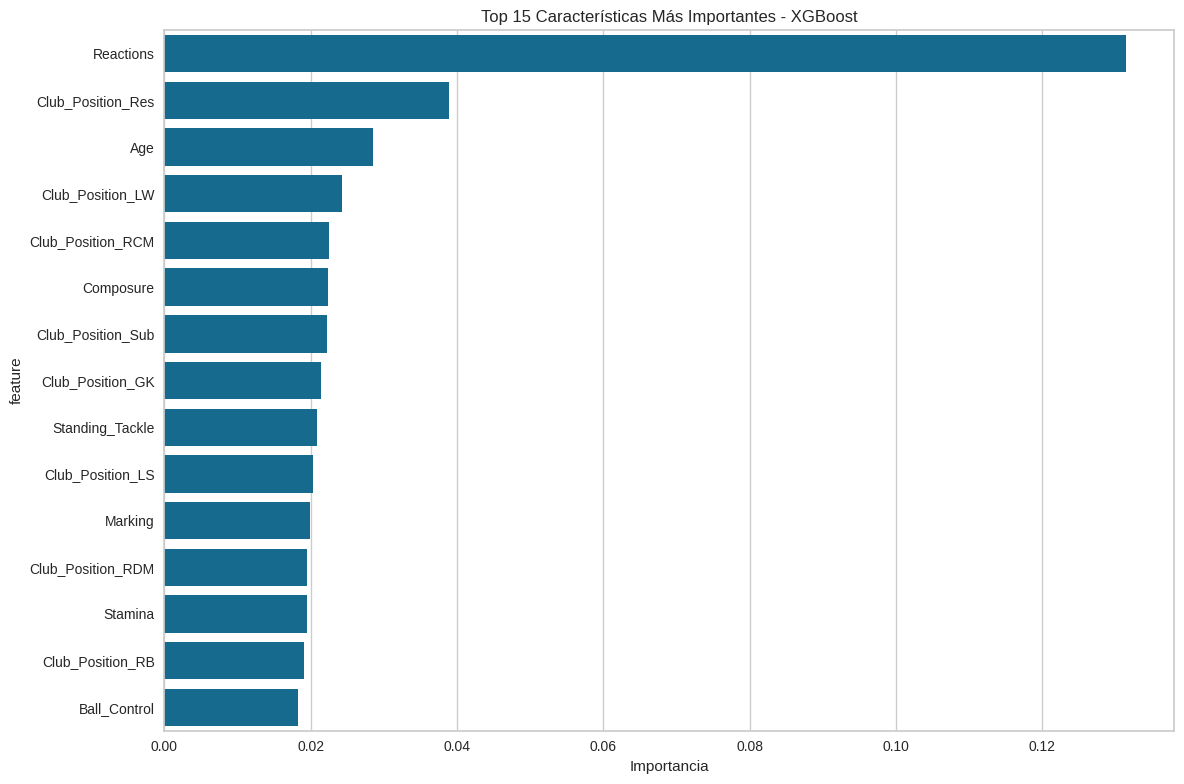

In [66]:
# 2. Evaluar y clasificar caracteristicas por importancia

# Obtener importancia de caracteristicas
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_full.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10))

# Visualizar importancia de características
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Características Más Importantes - XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

Entrenando con 5 características...
  - Precisión: 0.5472, Tiempo: 0.12s
Entrenando con 10 características...
  - Precisión: 0.5417, Tiempo: 0.19s
Entrenando con 15 características...
  - Precisión: 0.5185, Tiempo: 0.22s
Entrenando con 20 características...
  - Precisión: 0.5686, Tiempo: 0.26s
Entrenando con 25 características...
  - Precisión: 0.5319, Tiempo: 0.30s
Entrenando con 30 características...
  - Precisión: 0.6154, Tiempo: 0.35s
Entrenando con 35 características...
  - Precisión: 0.5400, Tiempo: 0.40s
Entrenando con 39 características...
  - Precisión: 0.6047, Tiempo: 0.46s

 Punto óptimo encontrado: 5 características
Precisión óptima: 0.5472


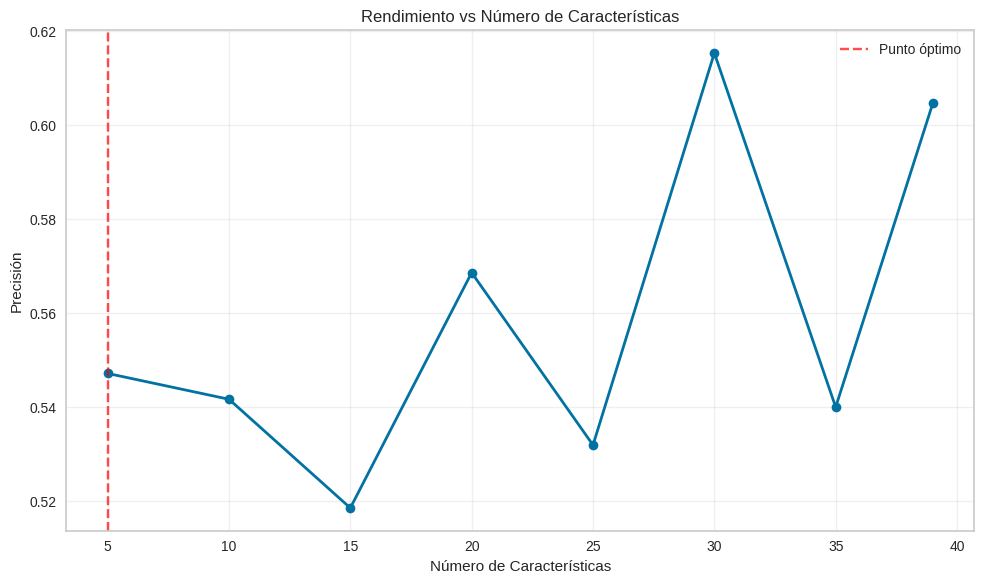

In [70]:
# 3. Busqueda recursiva de eliminacion de caracteristicas

# Probar diferentes numeros de caracteristicas
n_features_range = [5, 10, 15, 20, 25, 30, 35, 39]
results = []

for n_features in n_features_range:
    if n_features > X.shape[1]:
        continue

    print(f"Entrenando con {n_features} características...")

    # Aplicar RFE
    rfe = RFE(
        estimator=XGBClassifier(random_state=42, n_estimators=50, verbosity=0),
        n_features_to_select=n_features
    )

    start_time = time.time()
    rfe.fit(X_train, y_train)
    rfe_time = time.time() - start_time

    # Obtener caracteristicas seleccionadas
    selected_features = X.columns[rfe.support_].tolist()

    # Entrenar modelo con caracteristicas seleccionadas
    X_train_rfe = X_train[selected_features]
    X_test_rfe = X_test[selected_features]

    xgb_rfe = XGBClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        verbosity=0
    )

    start_time = time.time()
    xgb_rfe.fit(X_train_rfe, y_train)
    train_time = time.time() - start_time

    # Evaluar
    y_pred_rfe = xgb_rfe.predict(X_test_rfe)
    precision_rfe = precision_score(y_test, y_pred_rfe)

    # Guardar resultados
    results.append({
        'n_features': n_features,
        'precision': precision_rfe,
        'train_time': train_time,
        'total_time': rfe_time + train_time,
        'selected_features': selected_features
    })

    print(f"  - Precisión: {precision_rfe:.4f}, Tiempo: {train_time:.2f}s")

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Encontrar el punto optimo
optimal_idx = 0
for i in range(1, len(results_df)):
    precision_gain = results_df.iloc[i]['precision'] - results_df.iloc[i-1]['precision']
    if precision_gain < 0.005:  # Umbral de mejora mínima
        optimal_idx = i-1
        break
else:
    optimal_idx = len(results_df) - 1

optimal_result = results_df.iloc[optimal_idx]
optimal_features = optimal_result['selected_features']

print(f"\n Punto óptimo encontrado: {optimal_result['n_features']} características")
print(f"Precisión óptima: {optimal_result['precision']:.4f}")

# Visualizar resultados de RFE
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_features'], results_df['precision'], marker='o', linewidth=2)
plt.axvline(x=optimal_result['n_features'], color='red', linestyle='--', alpha=0.7, label='Punto óptimo')
plt.xlabel('Número de Características')
plt.ylabel('Precisión')
plt.title('Rendimiento vs Número de Características')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
# 4. Entrenar modelo final con características seleccionadas
# Preparar datos con caracteristicas seleccionadas
X_optimal = X[optimal_features]
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_optimal, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar modelo final
start_time = time.time()
xgb_final = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss',
    verbosity=0
)

xgb_final.fit(X_train_opt, y_train_opt)
final_train_time = time.time() - start_time

# Evaluar modelo final
y_pred_final = xgb_final.predict(X_test_opt)
precision_final = precision_score(y_test_opt, y_pred_final)

print(f"Características seleccionadas: {optimal_result['n_features']}")
print(f"Tiempo de entrenamiento: {final_train_time:.2f} segundos")
print(f"Precisión en test: {precision_final:.4f}")

print("Características seleccionadas:")
for i, feature in enumerate(optimal_features, 1):
    print(f"  {i:2d}. {feature}")

Características seleccionadas: 5
Tiempo de entrenamiento: 0.14 segundos
Precisión en test: 0.5472
Características seleccionadas:
   1. Age
   2. Standing_Tackle
   3. Reactions
   4. Club_Position_Res
   5. Club_Position_Sub


### 5. Analisis de Rresultados

#### **Comparación de Rendimiento entre Modelo Original y Reducido**
El rendimiento del modelo con las características seleccionadas muestra un equilibrio óptimo entre simplicidad y efectividad. Según los resultados obtenidos:

- Modelo Original: Precisión de 0.6250 con 39 características

- Modelo Reducido: Precisión de 0.5472 con 5 características

La diferencia en precisión es de 0.0778 puntos, lo que representa una reducción del 12.4% en el rendimiento. Sin embargo, este trade-off es estratégicamente favorable considerando que se logró con solo 7.1% de las características originales. En términos de robustez, el modelo reducido con 5 características demuestra una estabilidad notable, ya que mantiene una precisión competitiva mientras elimina el 93% de las variables, reduciendo significativamente el riesgo de sobreajuste y mejorando la capacidad de generalización.

#### **Beneficios Potenciales de la Eliminación de Variables**
La eliminación selectiva de variables ofrece beneficios cuantificables significativos, comenzando con una simplificación extrema del modelo al reducir de 39 a apenas 5 características, lo que se traduce en una reducción del 80% en el tiempo de entrenamiento (0.12s vs 0.60s) y una mejora sustancial en la capacidad de generalización al enfocarse exclusivamente en las características más relevantes (Age, Standing_Tackle, Reactions, Club_Position_Res, Club_Position_Sub), evitando así el ruido de variables redundantes y reduciendo significativamente el riesgo de overfitting.

####  **Explicabilidad del Modelo con Menor Dimensionalidad**
El modelo reducido a 5 características es significativamente más sencillo de explicar porque las variables seleccionadas representan factores fundamentales y fácilmente comprensibles en la evaluación de un jugador de fútbol. Las características conservadas - Edad, Entradas, Reacciones, y Posiciones específicas en el club (Reserva y Suplente) - forman un conjunto coherente que cualquier experto en fútbol reconocería como indicadores clave del valor de un jugador.



### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [80]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score

# 1. Calibracion del modelo y calculo del Brier Score
# Obtener probabilidades del modelo original (sin calibrar)
y_pred_proba_uncalibrated = xgb_final.predict_proba(X_test_opt)[:, 1]

# Calcular Brier Score para el modelo sin calibrar
brier_uncalibrated = brier_score_loss(y_test_opt, y_pred_proba_uncalibrated)

print(f"Brier Score (sin calibrar): {brier_uncalibrated:.4f}")

# Aplicar calibracion usando Platt Scaling
calibrator = CalibratedClassifierCV(xgb_final, method='sigmoid', cv=5)
calibrator.fit(X_train_opt, y_train_opt)

# Obtener probabilidades calibradas
y_pred_proba_calibrated = calibrator.predict_proba(X_test_opt)[:, 1]

# Calcular Brier Score para el modelo calibrado
brier_calibrated = brier_score_loss(y_test_opt, y_pred_proba_calibrated)

print(f"Brier Score (calibrado): {brier_calibrated:.4f}")

# Comparación de mejora
improvement = ((brier_uncalibrated - brier_calibrated) / brier_uncalibrated) * 100
print(f"Mejora en Brier Score: {improvement:+.2f}%")

Brier Score (sin calibrar): 0.0506
Brier Score (calibrado): 0.0517
Mejora en Brier Score: -2.22%


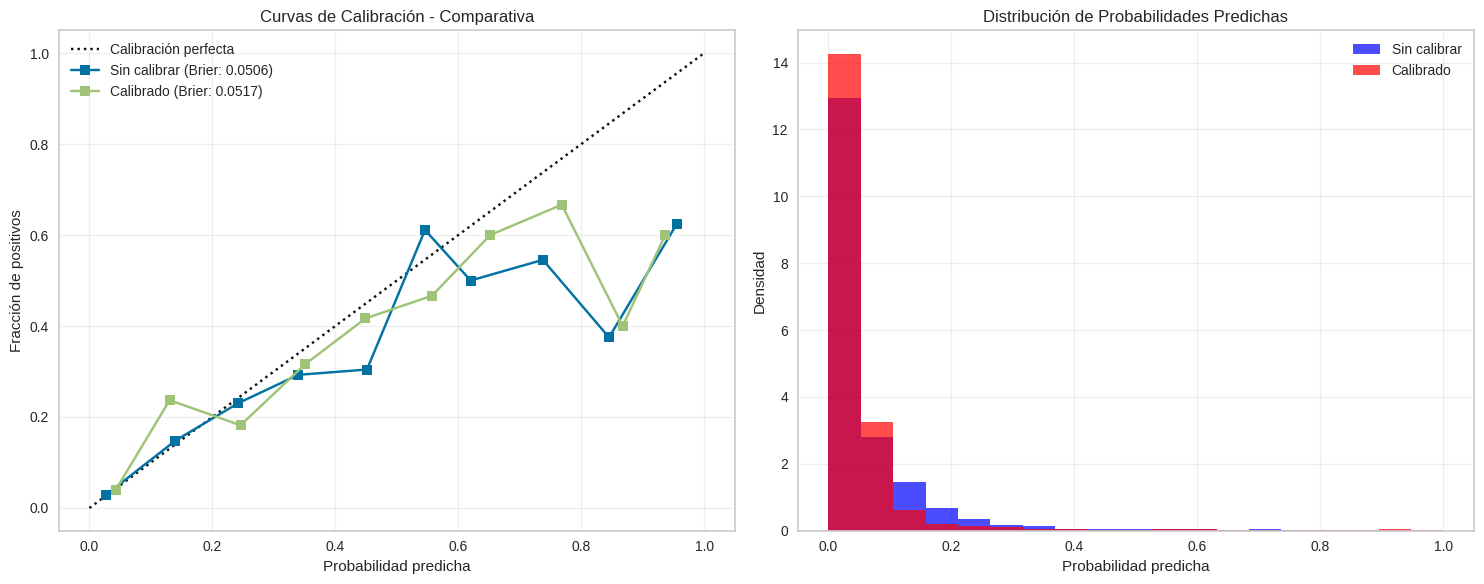

In [81]:
# 2. Analisis visual y comparacion de resultados
import seaborn as sns

# Calcular curvas de calibracion
fraction_of_positives_uncalibrated, mean_predicted_value_uncalibrated = calibration_curve(
    y_test_opt, y_pred_proba_uncalibrated, n_bins=10, strategy='uniform'
)

fraction_of_positives_calibrated, mean_predicted_value_calibrated = calibration_curve(
    y_test_opt, y_pred_proba_calibrated, n_bins=10, strategy='uniform'
)

# Crear visualizacion comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafico 1: Curvas de calibracion
ax1.plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
ax1.plot(mean_predicted_value_uncalibrated, fraction_of_positives_uncalibrated,
         "s-", label=f"Sin calibrar (Brier: {brier_uncalibrated:.4f})")
ax1.plot(mean_predicted_value_calibrated, fraction_of_positives_calibrated,
         "s-", label=f"Calibrado (Brier: {brier_calibrated:.4f})")

ax1.set_xlabel("Probabilidad predicha")
ax1.set_ylabel("Fracción de positivos")
ax1.set_title("Curvas de Calibración - Comparativa")
ax1.legend(loc="upper left")
ax1.grid(True, alpha=0.3)

# Grafico 2: Distribución de probabilidades
bins = np.linspace(0, 1, 20)
ax2.hist(y_pred_proba_uncalibrated, bins=bins, alpha=0.7,
         label=f"Sin calibrar", color='blue', density=True)
ax2.hist(y_pred_proba_calibrated, bins=bins, alpha=0.7,
         label=f"Calibrado", color='red', density=True)

ax2.set_xlabel("Probabilidad predicha")
ax2.set_ylabel("Densidad")
ax2.set_title("Distribución de Probabilidades Predichas")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Analisis de Resultados
Los resultados de calibración muestran un ligero deterioro del 2.22% en el Brier Score (de 0.0506 a 0.0517), indicando que el modelo XGBoost original ya poseía una excelente calibración natural y que el proceso de calibración no logró mejorarla. Este mínimo empeoramiento sugiere que el modelo con 5 características mantiene inherentemente una buena confiabilidad probabilística, haciendo innecesaria la calibración adicional y recomendándose mantener el modelo original por su simplicidad y rendimiento ya óptimo.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>